NO3 Plate Processing

In [290]:
#install.packages('tibble')

In [291]:
library(readxl)
library(tidyverse)
library(dplyr)
library(ggplot2)

In [292]:
getwd()

[1] "/Users/brookesienkiewicz/Documents/LabNotebook/Nutrients"

In [293]:
# load plate raws 
test <- read_excel("plate_results/stnd_test2.xlsx")

New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


In [294]:
head(test)

Software Version,3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Experiment File Path:,C:\Users\Public\Documents\Experiments\sienkiewicz_winbourne\std_test.xpt,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Protocol File Path:,C:\Users\Public\Documents\Experiments\sienkiewicz_winbourne\nitrate_updated.prt,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Plate Number,Plate 3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Date,45721,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Time,0.75908564814814816,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [295]:
options(scipen = 999)
options(digits = 5)  

In [296]:
# pull out raw results 
raw <-test %>%
    select(2:14) %>%
        slice(c(42:57)) %>%
# get rid of scientific notation
            mutate(across(everything(), ~ as.numeric(.))) %>% 
                mutate(across(everything(), ~ round(., 4))) 
head(raw)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(everything(), ~as.numeric(.))`.
Caused by warning:
! NAs introduced by coercion”


3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
NA,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
NA,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
NA,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
NA,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
NA,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087


In [297]:
## data cleanup 
# fix colnames 
colnames(raw) <- raw[1, ]
colnames(raw)[1] <- "letter"
# remove first row 
raw <- raw[-1,]
# convert to df
raw <- as.data.frame(raw)
raw

letter,1,2,3,4,5,6,7,8,9,10,11,12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
NA,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
NA,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
NA,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
NA,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087
NA,0.010,0.007,0.005,0.006,0.006,0.008,0.781,0.054,0.002,0.000,-0.001,0.022
NA,0.080,0.071,0.072,0.068,0.066,0.067,0.478,0.064,0.064,0.064,0.064,0.098
NA,0.015,0.007,0.008,0.003,0.001,0.002,0.413,-0.001,-0.001,0.000,-0.001,0.033
NA,0.072,0.073,0.107,0.092,0.098,0.106,0.199,0.064,0.848,0.485,0.121,0.109


In [298]:
# rename rows
n_rows <- nrow(raw)
letters_vec <- letters[1:((n_rows + 1) %/% 2)]
rownames(raw) <- paste0(rep(letters_vec, each = 2)[1:n_rows], 
                              c(rep(c("", "_blank"), length(letters_vec)), FALSE)[1:n_rows])
# remove first columns
raw <- raw[, -1]
raw

,1,2,3,4,5,6,7,8,9,10,11,12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
a_blank,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
b,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
b_blank,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
c,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087
c_blank,0.010,0.007,0.005,0.006,0.006,0.008,0.781,0.054,0.002,0.000,-0.001,0.022
d,0.080,0.071,0.072,0.068,0.066,0.067,0.478,0.064,0.064,0.064,0.064,0.098
d_blank,0.015,0.007,0.008,0.003,0.001,0.002,0.413,-0.001,-0.001,0.000,-0.001,0.033
e,0.072,0.073,0.107,0.092,0.098,0.106,0.199,0.064,0.848,0.485,0.121,0.109


# Standard Test - processing 
- for now, not worring about the 'blank' reading 
- didn't use the last 2 rows
- 3x low and 2x normal standards
- 2 duplicate test samples 
- 3x 3 QC checks using ERA standard 

In [299]:
# calculate standard curve of low stnd using linear model 
# pull out plate setup 
plate_setup<-test %>%
 select(2:14) %>%
        slice(c(22:36)) 

plate_setup <- as.data.frame(plate_setup)
head(plate_setup)

,3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
2,NA,0,5.0000000000000001E-3,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,5.0000000000000001E-3
3,B,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
4,NA,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
5,C,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
6,NA,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02


In [300]:
# rename rows
n_rows <- nrow(plate_setup)
letters_vec <- letters[1:((n_rows + 1) %/% 2)]
rownames(plate_setup) <- paste0(rep(letters_vec, each = 2)[1:n_rows], 
                              c(rep(c("", "_blank"), length(letters_vec)), FALSE)[1:n_rows])

#remove first col 
plate_setup <- plate_setup[, -1]
#rename cols 
colnames(plate_setup) <- as.character(1:12)

In [301]:
plate_setup

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
a_blank,0,5.0000000000000001E-3,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,5.0000000000000001E-3
b,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
b_blank,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
c,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
c_blank,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02
d,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:2,BLK,BLK,BLK,BLK,STD5
d_blank,NA,NA,NA,NA,NA,NA,0.5,NA,NA,NA,NA,0.03
e,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD6


In [302]:
# convert numbers to numeric and get rid of scientific notation
plate_setup[grepl("blank", rownames(plate_setup)), ] <- 
  lapply(plate_setup[grepl("blank", rownames(plate_setup)), ], function(x) round(as.numeric(x), 4))

In [303]:
plate_setup

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
a_blank,0,0.005,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,0.005
b,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
b_blank,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
c,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
c_blank,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02
d,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:2,BLK,BLK,BLK,BLK,STD5
d_blank,NA,NA,NA,NA,NA,NA,0.5,NA,NA,NA,NA,0.03
e,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD6


In [304]:
# pull out stnd concentrations and absorbance values 
low <- data.frame(id = plate_setup[1,1:7],
                  conc = plate_setup[2,1:7],
                  od = raw[1,1:7])

In [305]:
low

,id.1,id.2,id.3,id.4,id.5,id.6,id.7,conc.1,conc.2,conc.3,⋯,conc.5,conc.6,conc.7,od.1,od.2,od.3,od.4,od.5,od.6,od.7
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,STD1,STD2,STD3,STD4,STD5,STD6,STD7,0,0.005,0.01,⋯,0.03,0.04,0.05,0.079,0.098,0.082,0.092,0.145,0.114,0.121


In [306]:
low <- data.frame(id = unlist(plate_setup[1, 1:7]),
                    conc = unlist(plate_setup[2, 1:7]),
                    od = unlist(raw[1, 1:7]),
                    od2 = unlist(raw['e', 1:7])
                 )
low

,id,conc,od,od2
,<chr>,<chr>,<dbl>,<dbl>
1,STD1,0,0.079,0.072
2,STD2,0.005,0.098,0.073
3,STD3,0.01,0.082,0.107
4,STD4,0.02,0.092,0.092
5,STD5,0.03,0.145,0.098
6,STD6,0.04,0.114,0.106
7,STD7,0.05,0.121,0.199


In [307]:
#blank as std 1 (for 3rd rep)
low$od3 <- raw['a', 8] 
# rest of stds from 3rd rep  
low[2:7,'od3'] <- raw[seq(from = 1, to = 11, by = 2), 12]
low

,id,conc,od,od2,od3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,STD1,0,0.079,0.072,0.066
2,STD2,0.005,0.098,0.073,0.079
3,STD3,0.01,0.082,0.107,0.077
4,STD4,0.02,0.092,0.092,0.087
5,STD5,0.03,0.145,0.098,0.098
6,STD6,0.04,0.114,0.106,0.109
7,STD7,0.05,0.121,0.199,0.171


In [308]:
# check character types (all need to be numeric to run model)
str(low)

'data.frame':	7 obs. of  5 variables:
 $ id  : chr  "STD1" "STD2" "STD3" "STD4" ...
 $ conc: chr  "0" "0.005" "0.01" "0.02" ...
 $ od  : num  0.079 0.098 0.082 0.092 0.145 0.114 0.121
 $ od2 : num  0.072 0.073 0.107 0.092 0.098 0.106 0.199
 $ od3 : num  0.066 0.079 0.077 0.087 0.098 0.109 0.171


In [309]:
# convert concentration to numeric 
low$conc <- as.numeric(as.character(low$conc))

In [310]:
# calculate avg, standard deviation  and pivot 
low$avg_od <- rowMeans(low[, c("od", "od2", "od3")])

# pivot
low_long<-low %>% pivot_longer(cols = c("od", "od2", "od3"),
             names_to = 'rep',
             values_to = 'od')
# std dev
low_long <- low_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [311]:
# create linear standard curve 
# conc is predictor (x axis), and od is response variable (y axis)
low_model <- lm(od ~ conc, data = low_long)
# view summary stats (R-squared)
summary(low_model)


Call:
lm(formula = od ~ conc, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02363 -0.01563 -0.00462  0.00881  0.05451 

Coefficients:
            Estimate Std. Error t value    Pr(>|t|)    
(Intercept)  0.07019    0.00742    9.46 0.000000013 ***
conc         1.48612    0.26402    5.63 0.000019908 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0209 on 19 degrees of freedom
Multiple R-squared:  0.625,	Adjusted R-squared:  0.605 
F-statistic: 31.7 on 1 and 19 DF,  p-value: 0.0000199


In [312]:
## use the averages for the curve 
low_avg_model <- lm(avg_od ~ conc, data = low_long)
summary(low_avg_model)


Call:
lm(formula = avg_od ~ conc, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01997 -0.00958  0.00215  0.00571  0.01917 

Coefficients:
            Estimate Std. Error t value       Pr(>|t|)    
(Intercept)  0.07019    0.00425   16.52 0.000000000001 ***
conc         1.48612    0.15124    9.83 0.000000006973 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.012 on 19 degrees of freedom
Multiple R-squared:  0.836,	Adjusted R-squared:  0.827 
F-statistic: 96.6 on 1 and 19 DF,  p-value: 0.00000000697


In [313]:
head(low_long)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
STD1,0.000,0.072333,od,0.079,0.0065064
STD1,0.000,0.072333,od2,0.072,0.0065064
STD1,0.000,0.072333,od3,0.066,0.0065064
STD2,0.005,0.083333,od,0.098,0.0130512
STD2,0.005,0.083333,od2,0.073,0.0130512
STD2,0.005,0.083333,od3,0.079,0.0130512


`geom_smooth()` using formula = 'y ~ x'


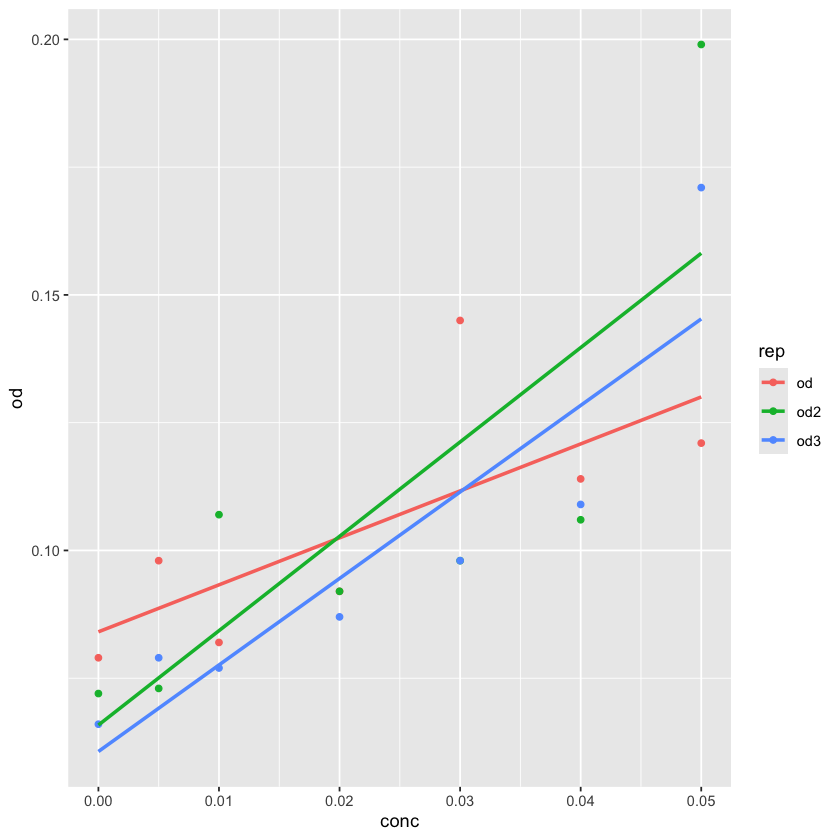

In [314]:
# Plot the data with the regression line
ggplot(low_long, aes(x = conc, y = od, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


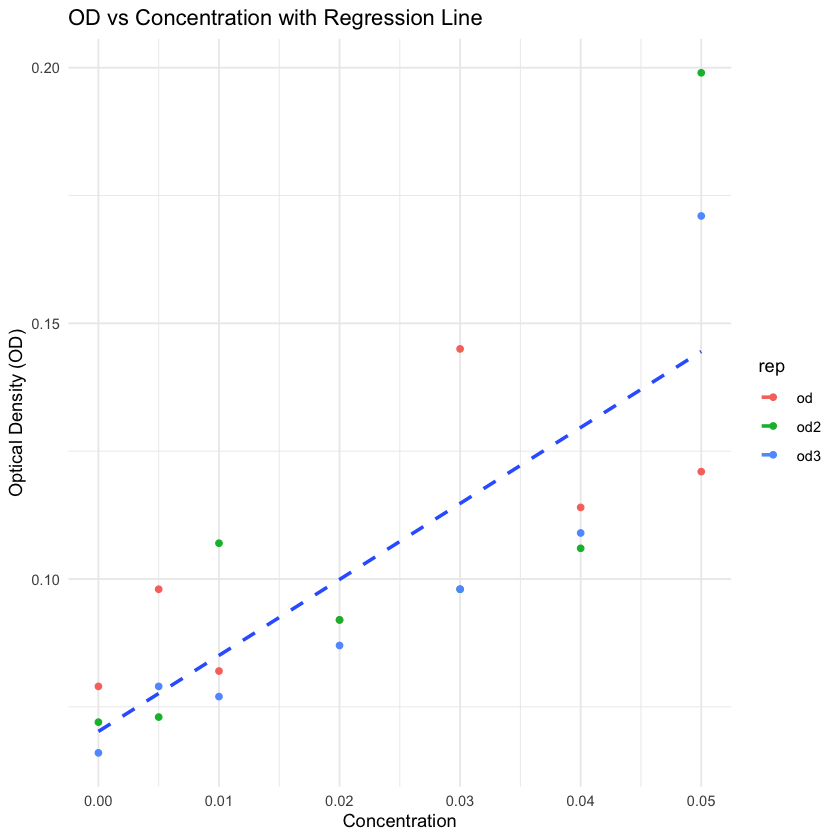

In [315]:
ggplot(low_long, aes(x = conc, y = od, color = rep)) + 
  geom_point() +  # Show each individual replicate
  geom_smooth(method = "lm", se = FALSE, aes(group = 1), linetype = "dashed") +  # Add regression line
  labs(x = "Concentration", y = "Optical Density (OD)", title = "OD vs Concentration with Regression Line") + 
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


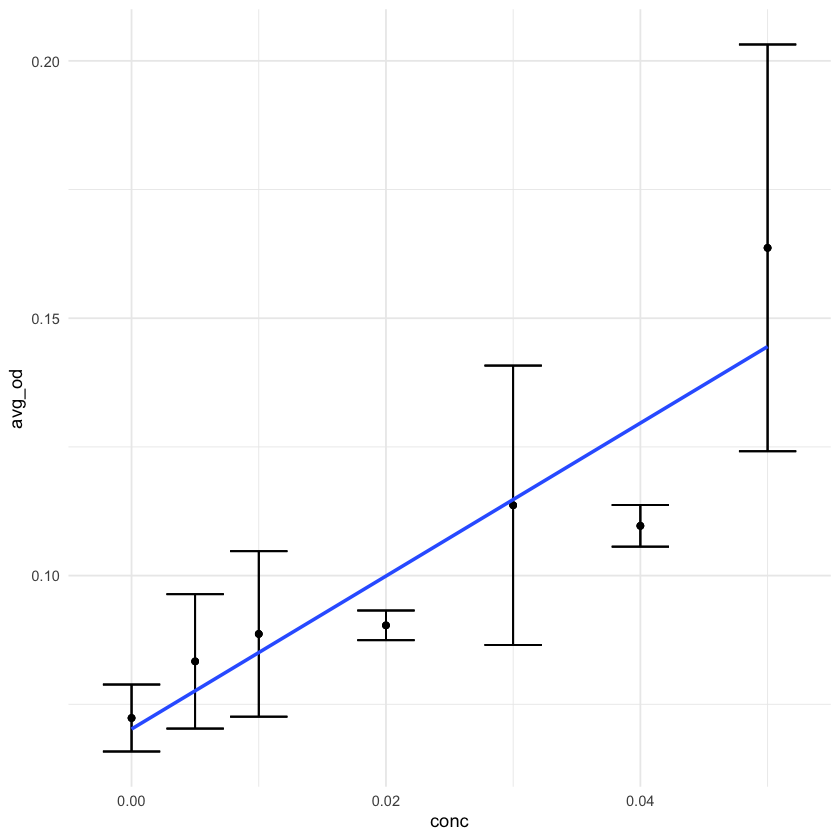

In [319]:
ggplot(low_long, aes(x = conc, y = avg_od)) + 
  geom_point() +  # Plot the average OD
  geom_errorbar(aes(ymin = avg_od - sd, ymax = avg_od + sd)) +  # Add error bars for SD
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()
